# Machine Learning con scikit-learn

## Importo le librerie necessarie al progetto

In [1]:
import random

import pandas as pd
import numpy as np

from sklearn.datasets import load_digits
import matplotlib.pyplot as plt



import my_functions as mf



## Carico il dataset su cui lavorare

In [2]:
dig = load_digits()

In [3]:
dig.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

## Train test split    
Separi i dati in 2 gruppi: il gruppo train lo utilizzo per l'addestrmaento dell'algoritmo e il gruppo 
test lo uso per verificare le performance dell'algoritmo. Tipicamente train 75% + test 25%.     


In [4]:
from sklearn.model_selection import train_test_split

SEED = 42

In [5]:
X = dig.data # dati numerici associati alla matrice delle digits
y = dig.target # target di ciascuna matrice


X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = SEED)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1347, 64), (450, 64), (1347,), (450,))

## Definisco e creo un dizionario con i modelli da implementare

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import LinearSVC, SVC

from sklearn.metrics import accuracy_score, confusion_matrix


In [14]:
knn_model = KNeighborsClassifier()
g_nb = GaussianNB()
b_nb = BernoulliNB()
l_svc = LinearSVC(random_state=SEED)
svc = SVC(random_state=SEED)

models = {"knn_model": knn_model,
          "g_nb":  g_nb,
          "b_nb":  b_nb,
          "l_svc": l_svc,
          "svc": svc}


## Addestramento e valutazione dei modelli

In [15]:
for model_name, model in models.items():
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"{model_name} accuracy_score = {accuracy_score(y_test, y_pred)}")
    print(pd.DataFrame(confusion_matrix(y_test, y_pred)))
    print()
    
    

knn_model accuracy_score = 0.9933333333333333
    0   1   2   3   4   5   6   7   8   9
0  43   0   0   0   0   0   0   0   0   0
1   0  37   0   0   0   0   0   0   0   0
2   0   0  38   0   0   0   0   0   0   0
3   0   0   0  46   0   0   0   0   0   0
4   0   0   0   0  55   0   0   0   0   0
5   0   0   0   0   0  58   0   0   0   1
6   0   0   0   0   0   0  45   0   0   0
7   0   0   0   0   0   0   0  41   0   0
8   0   0   0   0   0   0   0   0  38   0
9   0   0   0   0   1   1   0   0   0  46

g_nb accuracy_score = 0.8555555555555555
    0   1   2   3   4   5   6   7   8   9
0  41   0   0   0   0   1   0   1   0   0
1   0  29   2   0   0   0   0   0   4   2
2   0   2  23   0   0   0   1   0  12   0
3   0   0   1  38   0   1   0   0   5   1
4   0   0   0   0  46   0   2   7   0   0
5   0   0   0   0   0  56   1   1   0   1
6   0   0   0   0   1   1  43   0   0   0
7   0   0   0   0   0   1   0  40   0   0
8   0   2   0   0   0   0   0   2  34   0
9   0   1   1   1   0   2   1 

C:\Users\simon\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## mplementazione della CV

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict

import warnings

warnings.filterwarnings("ignore")

In [20]:
# creo le fold per la cv
cv_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)


for model_name, model in models.items():
    
    
    # valuto il modello sulle fold create
    scores = cross_val_score(model, X, y, cv=cv_fold, verbose=0)
       
    print(f"{model_name} CV_score = {scores.mean()} +- {scores.std()}")
    print()
    

knn_model CV_score = 0.9860738671632527 +- 0.010932533671578521

g_nb CV_score = 0.8425108628181253 +- 0.02766478288819924

b_nb CV_score = 0.853100558659218 +- 0.018197322721628665

l_svc CV_score = 0.948792675356921 +- 0.015140894321463863

svc CV_score = 0.9888671632526382 +- 0.007059259993812237



In [49]:
# creo le fold per la cv
cv_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)

# valuto il modello sulle fold create
scores = cross_val_score(knn_for_CV, X, y, cv=cv_fold, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [51]:
scores.mean(), scores.std()

(0.9855245189323402, 0.008348092424618325)

In [54]:
cross_val_predict(knn_for_CV, X, y)

array([0, 1, 8, ..., 8, 9, 8])

## Data Augmentation

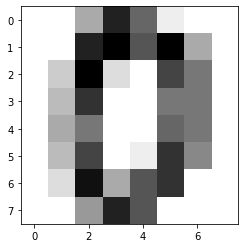

In [67]:
x0 = X[0].reshape(8,8)

plt.imshow(x0, cmap=plt.cm.gray_r)
plt.show()

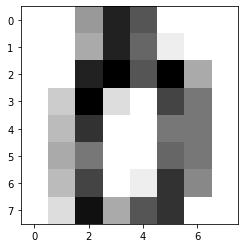

In [68]:
x0_t1 = np.roll(x0, 1, axis = 0)
plt.imshow(x0_t1, cmap=plt.cm.gray_r)
plt.show()

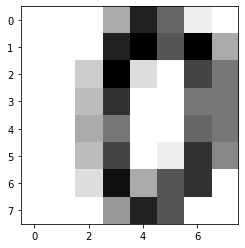

In [69]:
x0_t1 = np.roll(x0, 1, axis = 1)
plt.imshow(x0_t1, cmap=plt.cm.gray_r)
plt.show()

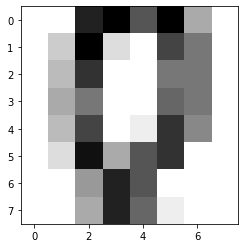

In [70]:
x0_t1 = np.roll(x0, -1, axis = 0)
plt.imshow(x0_t1, cmap=plt.cm.gray_r)
plt.show()

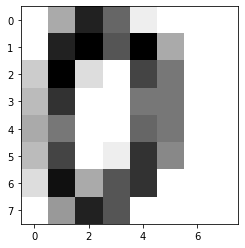

In [71]:
x0_t1 = np.roll(x0, -1, axis = 1)
plt.imshow(x0_t1, cmap=plt.cm.gray_r)
plt.show()

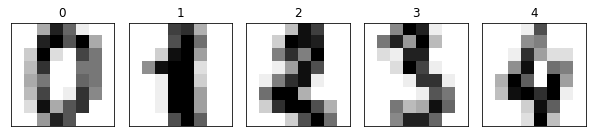

In [77]:
X_squared = X.reshape(1797,8,8)
images =  X_squared[:5]
targets = y[:5]
mf.show_multiple_img(images, targets)

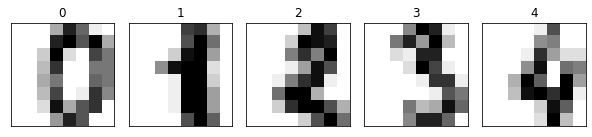

In [80]:
X_rolled_1 = np.roll(X_squared, 1, axis=2)
images =  X_rolled[:5]
targets = y[:5]
mf.show_multiple_img(images, targets)

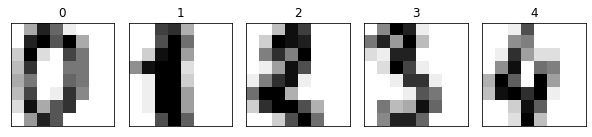

In [83]:
X_rolled_2 = np.roll(X_squared, -1, axis=2)
images =  X_rolled[:5]
targets = y[:5]
mf.show_multiple_img(images, targets)

In [88]:

X_squared = X.reshape(1797,8,8)
X_rolled_1 = np.roll(X_squared, 1, axis=2).reshape(1797,64)
X_rolled_2 = np.roll(X_squared, -1, axis=2).reshape(1797,64)

# Adesso eseguiamo lo stacking su X, X_rolled_1 e X_rolled_2

X = np.concatenate((X, X_rolled_1,X_rolled_2))
y = np.tile(y, 3)
X.shape, y.shape

((5391, 64), (5391,))

In [91]:
# Valutiamo il modell con la crossValidation:
# costruisamo il modello
knn_for_CV = KNeighborsClassifier(n_neighbors=7)

# creo le fold per la cv
cv_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)

# valuto il modello sulle fold create
scores = cross_val_score(knn_for_CV, X, y, cv=cv_fold, verbose=1)
scores.mean(), scores.std()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished


(0.9849745756888615, 0.003753401728146326)

## Ottimizzazione degli iperparametri

In [30]:

def knn_iperparameter_avaluation(n_neigh, X_train, y_train, X_test, y_test):
    
    # Creo il modello
    knn_model = KNeighborsClassifier(n_neighbors=n_neigh)
    
    # Eseguo il fitting del modello sui dati:
    knn_model.fit(X_train, y_train)
    
    # Valuto il modello
    score = knn_model.score(X_test, y_test)
    
    return score

results = {}   
for n in range(1, 51):
    
    results[n] = knn_iperparameter_avaluation(n, X_train, y_train, X_test, y_test)


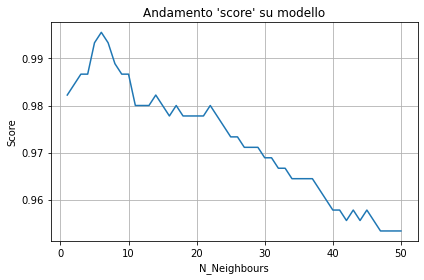

In [31]:
plt.plot(results.keys(), results.values())
plt.title("Andamento 'score' su modello")

plt.xlabel("N_Neighbours")
plt.ylabel("Score")

plt.tight_layout()
plt.grid(visible = True)
plt.show()

### Applicazione dello stesso modello a un set di dati su Kaggle:

In [32]:

# https://www.kaggle.com/sgiuri/ml-pd-digits